<a href="https://colab.research.google.com/github/mpietrzy/handson-ml2/blob/master/mdp_scripts/c4_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Normal Equation



In [6]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# imports -----
import numpy as np

# generate some linear data -----
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

# compute thetas using normal equation ----
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.93838926]
 [3.06532396]]


In [3]:
# predictions -----
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.93838926]
 [10.06903719]]


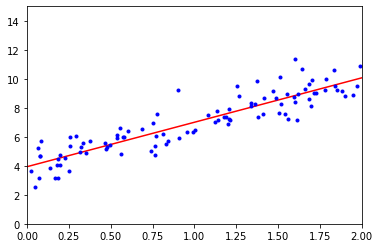

In [5]:
# plot -----
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## Linear Regression with Scikit-Learn

In [10]:
# train -----
lin_reg = LinearRegression()
lin_reg.fit(X,y)

# estimated parameters -----
print(lin_reg.intercept_)
print(lin_reg.coef_)

# prediction -----
lin_reg.predict(X_new)

[3.93838926]
[[3.06532396]]


array([[ 3.93838926],
       [10.06903719]])

Scikit-learn's implementation is based on scipy's least squares algorithm that
employs the Moore-Penrose inverse.. or the pseudoinverse due to the complexity 
of inverting some matrices.  The Moore-Penrose inverse uses SVD (singular value decompostion)


In [11]:
# using scipy's least squares algorithm and the pseuodinverse
theta_best_svd, residuals, ranks, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.93838926],
       [3.06532396]])